In [345]:
%matplotlib inline
from sklearn import linear_model
import statsmodels.formula.api as smf
from IPython.display import display
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

In [346]:
NY_Crime = pd.read_csv('NYM.csv')
NY_Crime.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,NaN
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,NaN


In [347]:
NY_Crime.columns = NY_Crime.iloc[3]
NY_Crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,NaN
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,NaN


In [348]:
NY_Crime = NY_Crime.drop(NY_Crime.index[:4])
NY_Crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,NaN
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0,NaN
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0,NaN
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,NaN


In [349]:
NY_Crime = NY_Crime.reset_index(drop=True)

In [350]:
NY_Crime.drop(labels=[348, 349, 350], axis=0, inplace=True)

In [351]:
NY_Crime.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,NaN
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0,NaN
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0,NaN
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,NaN


In [352]:
NY_Crime.rename(columns = {"Murder and\nnonnegligent\nmanslaughter" : 'Murder'}, inplace=True)
NY_Crime.rename(columns = {"Property\ncrime" : 'Property_Crime'}, inplace=True)
NY_Crime.head()

3,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0,NaN
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0,NaN
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0,NaN
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,NaN


In [353]:

NY_Crime['Murder'] = NY_Crime['Murder'].str.replace(",", "")
NY_Crime['Robbery'] = NY_Crime['Robbery'].str.replace(",", "")
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].str.replace(",", "")
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].astype(int)
NY_Crime['Murder'] = NY_Crime['Murder'].astype(int)
NY_Crime['Robbery'] = NY_Crime['Robbery'].astype(int)
NY_Crime['Population'] = NY_Crime['Population'].str.replace(",", "")
NY_Crime['Population'] = NY_Crime.Population.astype(int)

In [354]:
NY_Crime['Murder2'] = NY_Crime['Murder'].apply(lambda x: 1 if x > 0 else 0)
NY_Crime['Robbery2'] = NY_Crime['Robbery'].apply(lambda x: 1 if x > 0 else 0)
NY_Crime.head()

3,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,Murder2,Robbery2
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0,NaN,0,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0,NaN,0,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0,NaN,0,0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,"3,243",142,NaN,NaN,1,1
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,NaN,0,1


In [355]:
NY_Crime['Population'] = NY_Crime['Population'].apply(lambda x: x if x < 10000 else 0)
NY_Crime['Property_Crime'] = NY_Crime['Property_Crime'].apply(lambda x: x if x < 1000 else 0)


In [391]:
NY_Crime['Population'] = NY_Crime['Population'].dropna(how='0')

In [393]:
NY_Crime = NY_Crime[['Property_Crime', 'Population', 'Robbery2']]
NY_Crime.head()

3,Property_Crime,Population,Robbery2
0,12,1861,0
1,24,2577,0
2,16,2846,0
3,0,0,1
4,223,6388,1


In [394]:
NY_Crimes = NY_Crime

In [395]:
NY_Crimes = pd.DataFrame()

In [396]:
NY_Crimes['Population'] = NY_Crime['Population']
NY_Crimes['Robbery2'] = NY_Crime['Robbery2']
NY_Crimes['Property_Crime'] = NY_Crime['Property_Crime']

In [406]:
NY_Crimes['Population'] = NY_Crimes[NY_Crimes['Population'] >= 1]

In [411]:
NY_Crimes['Population'] = NY_Crimes['Population'].dropna()

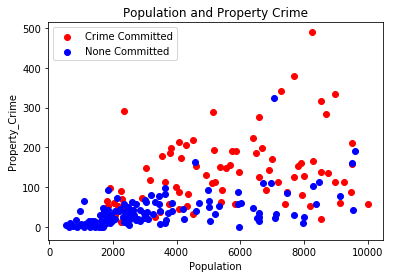

In [413]:
plt.scatter(
    NY_Crimes[NY_Crimes['Robbery2'] == 1].Population,
    NY_Crimes[NY_Crimes['Robbery2'] == 1].Property_Crime,
    color='red'
)
plt.scatter(
    NY_Crimes[NY_Crimes['Robbery2'] == 0].Population,
    NY_Crimes[NY_Crimes['Robbery2'] == 0].Property_Crime,
    color='blue'
)

plt.legend(['Crime Committed', 'None Committed'])
plt.title('Population and Property Crime')
plt.xlabel('Population')
plt.ylabel('Property_Crime')
plt.show()

In [418]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = NY_Crime[['Population', 'Property_Crime']]
Y = NY_Crime.Robbery2
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[3695, 85]])

array([0], dtype=int64)

In [417]:
neighbors1 = KNeighborsClassifier(n_neighbors=10)
X = NY_Crime[['Population', 'Property_Crime']]
Y = NY_Crime.Robbery2
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
print(neighbors.predict([[3695, 85]]))
print(neighbors.predict_proba([[3695, 85]]))

[0]
[[1. 0.]]


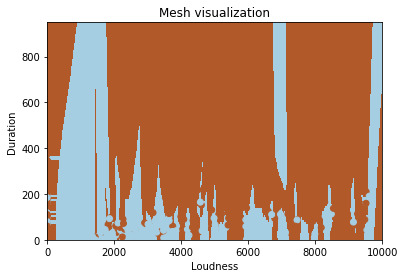

In [419]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 10.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [420]:
## This Mesh is a big mess, it run wild everywhere. 